In [0]:
import tensorflow as tf
import numpy as np
import matplotlib
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [0]:
import matplotlib.pyplot as plt

In [79]:
!ls -al

total 88
drwxr-xr-x 1 root root  4096 Jun  4 07:01 .
drwxr-xr-x 1 root root  4096 Jun  4 06:57 ..
-rw-r--r-- 1 root root 47412 Jun  4 07:15 bitcoin.csv
drwx------ 4 root root  4096 Jun  4 06:59 .cache
drwxr-xr-x 3 root root  4096 Jun  4 06:59 .config
drwxr-xr-x 1 root root  4096 Jun  4 07:01 datalab
drwxr-xr-x 4 root root  4096 Jun  4 06:57 .forever
drwxr-xr-x 5 root root  4096 Jun  4 06:59 .ipython
drwxr-xr-x 2 root root  4096 Jun  4 06:59 .keras
drwx------ 3 root root  4096 Jun  4 06:57 .local
-rw------- 1 root root  1024 Jun  4 06:57 .rnd


In [0]:
%matplotlib inline

In [0]:
bitData = pd.read_csv('bitcoin.csv')

In [82]:
bitData.tail(20)

,Date,Open,High,Low,Volume,Market Cap,Close,Unnamed: 7,Unnamed: 8
698,2016-07-05,683.21,683.49,665.07,130476000.0,1.074910e+10,670.63,NaN,NaN
699,2016-07-04,658.80,683.66,650.51,92008400.0,1.036270e+10,683.66,NaN,NaN
700,2016-07-03,704.97,704.97,649.01,129512000.0,1.108610e+10,658.66,NaN,NaN
701,2016-07-02,676.73,703.70,676.40,112354000.0,1.063960e+10,703.70,NaN,NaN
702,2016-07-01,672.52,686.15,669.59,134431000.0,1.057060e+10,676.30,NaN,NaN
703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
bitData = bitData.drop(bitData.columns[bitData.columns.str.contains('unnamed',case = False)],axis = 1)

In [84]:
bitData.tail(20)

,Date,Open,High,Low,Volume,Market Cap,Close
698,2016-07-05,683.21,683.49,665.07,130476000.0,1.074910e+10,670.63
699,2016-07-04,658.80,683.66,650.51,92008400.0,1.036270e+10,683.66
700,2016-07-03,704.97,704.97,649.01,129512000.0,1.108610e+10,658.66
701,2016-07-02,676.73,703.70,676.40,112354000.0,1.063960e+10,703.70
702,2016-07-01,672.52,686.15,669.59,134431000.0,1.057060e+10,676.30
703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
704,NaN,NaN,NaN,NaN,NaN,NaN,NaN
705,NaN,NaN,NaN,NaN,NaN,NaN,NaN
706,NaN,NaN,NaN,NaN,NaN,NaN,NaN
707,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
for i in range(15):
  bitData = bitData.drop( 703 + i, 0)

In [86]:
bitData.tail(20)

,Date,Open,High,Low,Volume,Market Cap,Close
683,2016-07-20,672.81,672.93,663.36,94636400.0,1.060860e+10,665.69
684,2016-07-19,672.74,673.28,667.63,61203300.0,1.060650e+10,672.86
685,2016-07-18,679.81,681.56,668.63,69465000.0,1.071680e+10,673.11
686,2016-07-17,661.99,682.37,661.99,74407900.0,1.043470e+10,679.46
687,2016-07-16,663.78,666.46,659.33,50330200.0,1.046170e+10,660.77
688,2016-07-15,659.17,667.08,659.04,81673100.0,1.038790e+10,663.26
689,2016-07-14,652.92,662.90,652.92,98511400.0,1.028840e+10,658.08
690,2016-07-13,664.80,668.70,654.47,131449000.0,1.047450e+10,654.47
691,2016-07-12,648.28,675.26,646.78,138173000.0,1.021310e+10,664.55
692,2016-07-11,648.48,659.63,644.98,107910000.0,1.021520e+10,647.66


In [87]:
bitData.shape
bitData = bitData[::-1]
bitData.tail(10)

,Date,Open,High,Low,Volume,Market Cap,Close
9,2018-05-25,7592.30,7659.14,7392.65,4.867830e+09,1.294700e+11,7480.14
8,2018-05-26,7486.48,7595.16,7349.12,4.051540e+09,1.276820e+11,7355.88
7,2018-05-27,7362.08,7381.74,7270.96,4.056520e+09,1.255750e+11,7368.22
6,2018-05-28,7371.31,7419.05,7100.89,5.040600e+09,1.257480e+11,7135.99
5,2018-05-29,7129.46,7526.42,7090.68,5.662660e+09,1.216360e+11,7472.59
4,2018-05-30,7469.73,7573.77,7313.60,4.922540e+09,1.274540e+11,7406.52
3,2018-05-31,7406.15,7608.90,7361.13,5.127130e+09,1.263860e+11,7494.17
2,2018-06-01,7500.70,7604.73,7407.34,4.921460e+09,1.280140e+11,7541.45
1,2018-06-02,7536.72,7695.83,7497.26,4.939300e+09,1.286450e+11,7643.45
0,2018-06-03,7632.09,7754.89,7613.04,4.851760e+09,1.302880e+11,7720.25


In [0]:
data_to_use = bitData['Close'].values  # close값을 예측하기위해 분리

In [89]:
print('Total number of days in the dataset: {}'.format(len(data_to_use)))  # 총 703개의 데이터보유

Total number of days in the dataset: 703


In [0]:
scaler = StandardScaler()

In [0]:
scaled_dataset = scaler.fit_transform(data_to_use.reshape(-1, 1))

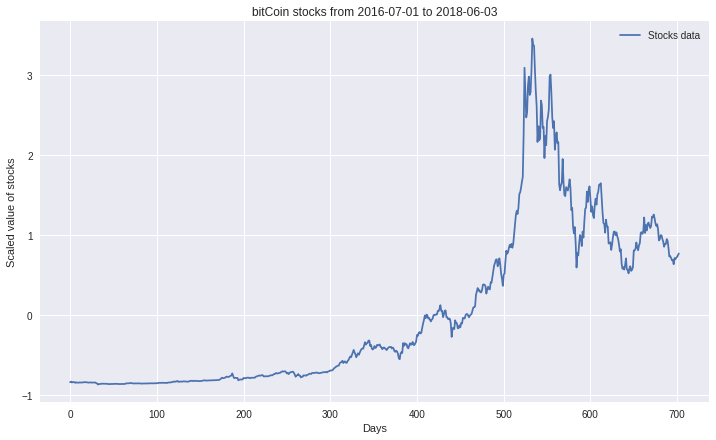

In [92]:
plt.figure(figsize=(12,7), frameon=False, facecolor='brown', edgecolor='blue')
plt.title('bitCoin stocks from 2016-07-01 to 2018-06-03')
plt.xlabel('Days')
plt.ylabel('Scaled value of stocks')
plt.plot(scaled_dataset, label='Stocks data')
plt.legend()
plt.show()

In [0]:
def window_data(data, window_size):
    X = []
    y = []
    
    i = 0
    while (i + window_size) <= len(data) - 1:
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
        
        i += 1
    assert len(X) ==  len(y)
    return X, y

In [0]:
X, y = window_data(scaled_dataset, 7)

In [0]:
X_train  = np.array(X[:700])
y_train = np.array(y[:700])

In [0]:
train_size = int(len(y_train) * 0.7)
test_size = len(y_train) - train_size

trainX, testX = np.array(X_train[0:train_size]), np.array(
    X_train[train_size:len(X_train)])
trainY, testY = np.array(y_train[0:train_size]), np.array(
    y_train[train_size:len(y_train)])

In [120]:
print("X_train size: {}".format(trainX.shape))
print("y_train size: {}".format(trainY.shape))
print("X_test size: {}".format(testX.shape))
print("y_test size: {}".format(testY.shape))

X_train size: (487, 7, 1)
y_train size: (487, 1)
X_test size: (209, 7, 1)
y_test size: (209, 1)


In [0]:
inputs = tf.placeholder(tf.float32, [batch_size, window_size, 1])
targets = tf.placeholder(tf.float32, [batch_size, 1])

In [0]:
epochs = 500
batch_size = 7

In [0]:
def LSTM_cell(hidden_layer_size, batch_size,number_of_layers, dropout=True, dropout_rate=0.8):
    
    layer = tf.contrib.rnn.BasicLSTMCell(hidden_layer_size)
    
    if dropout:
        layer = tf.contrib.rnn.DropoutWrapper(layer, output_keep_prob=dropout_rate)
        
    cell = tf.contrib.rnn.MultiRNNCell([layer]*number_of_layers)
    
    init_state = cell.zero_state(batch_size, tf.float32)
    
    return cell, init_state

In [0]:
def output_layer(lstm_output, in_size, out_size):
    
    x = lstm_output[:, -1, :]
    print(x)
    weights = tf.Variable(tf.truncated_normal([in_size, out_size], stddev=0.05), name='output_layer_weights')
    bias = tf.Variable(tf.zeros([out_size]), name='output_layer_bias')
    
    output = tf.matmul(x, weights) + bias
    return output

In [0]:
def opt_loss(logits, targets, learning_rate, grad_clip_margin):
    
    losses = []
    for i in range(targets.get_shape()[0]):
        losses.append([(tf.pow(logits[i] - targets[i], 2))])
        
    loss = tf.reduce_sum(losses)/(2*batch_size)
    
    #Cliping the gradient loss
    gradients = tf.gradients(loss, tf.trainable_variables())
    clipper_, _ = tf.clip_by_global_norm(gradients, grad_clip_margin)
    optimizer = tf.train.AdamOptimizer(learning_rate)
    train_optimizer = optimizer.apply_gradients(zip(gradients, tf.trainable_variables()))
    return loss, train_optimizer

In [0]:
class StockPredictionRNN(object):
    
    def __init__(self, learning_rate=0.001, batch_size=7, hidden_layer_size=512, number_of_layers=1, 
                 dropout=True, dropout_rate=0.8, number_of_classes=1, gradient_clip_margin=4, window_size=7):
    
        self.inputs = tf.placeholder(tf.float32, [batch_size, window_size, 1], name='input_data')
        self.targets = tf.placeholder(tf.float32, [batch_size, 1], name='targets')

        cell, init_state = LSTM_cell(hidden_layer_size, batch_size, number_of_layers, dropout, dropout_rate)

        outputs, states = tf.nn.dynamic_rnn(cell, self.inputs, initial_state=init_state)

        self.logits = output_layer(outputs, hidden_layer_size, number_of_classes)

        self.loss, self.opt = opt_loss(self.logits, self.targets, learning_rate, gradient_clip_margin)

In [0]:
class StockPredictionRNN1(object):
    
    def __init__(self, learning_rate=0.001, batch_size=7, hidden_layer_size=512, number_of_layers=1, 
                 dropout=True, dropout_rate=1.0, number_of_classes=1, gradient_clip_margin=4, window_size=7):
    
        self.inputs = tf.placeholder(tf.float32, [batch_size, window_size, 1], name='input_data')
        self.targets = tf.placeholder(tf.float32, [batch_size, 1], name='targets')

        cell, init_state = LSTM_cell(hidden_layer_size, batch_size, number_of_layers, dropout, dropout_rate)

        outputs, states = tf.nn.dynamic_rnn(cell, self.inputs, initial_state=init_state)

        self.logits = output_layer(outputs, hidden_layer_size, number_of_classes)

        self.loss, self.opt = opt_loss(self.logits, self.targets, learning_rate, gradient_clip_margin)

In [0]:
class StockPredictionRNN2(object):
    
    def __init__(self, learning_rate=0.001, batch_size=7, hidden_layer_size=512, number_of_layers=1, 
                 dropout=True, dropout_rate=0.9, number_of_classes=1, gradient_clip_margin=4, window_size=7):
    
        self.inputs = tf.placeholder(tf.float32, [batch_size, window_size, 1], name='input_data')
        self.targets = tf.placeholder(tf.float32, [batch_size, 1], name='targets')

        cell, init_state = LSTM_cell(hidden_layer_size, batch_size, number_of_layers, dropout, dropout_rate)

        outputs, states = tf.nn.dynamic_rnn(cell, self.inputs, initial_state=init_state)

        self.logits = output_layer(outputs, hidden_layer_size, number_of_classes)

        self.loss, self.opt = opt_loss(self.logits, self.targets, learning_rate, gradient_clip_margin)

In [0]:
class StockPredictionRNN3(object):
    
    def __init__(self, learning_rate=0.001, batch_size=7, hidden_layer_size=512, number_of_layers=1, 
                 dropout=True, dropout_rate=0.7, number_of_classes=1, gradient_clip_margin=4, window_size=7):
    
        self.inputs = tf.placeholder(tf.float32, [batch_size, window_size, 1], name='input_data')
        self.targets = tf.placeholder(tf.float32, [batch_size, 1], name='targets')

        cell, init_state = LSTM_cell(hidden_layer_size, batch_size, number_of_layers, dropout, dropout_rate)

        outputs, states = tf.nn.dynamic_rnn(cell, self.inputs, initial_state=init_state)

        self.logits = output_layer(outputs, hidden_layer_size, number_of_classes)

        self.loss, self.opt = opt_loss(self.logits, self.targets, learning_rate, gradient_clip_margin)

In [127]:
tf.reset_default_graph()
model = StockPredictionRNN()

Tensor("strided_slice:0", shape=(7, 512), dtype=float32)


In [0]:
session =  tf.Session()
session.run(tf.global_variables_initializer())

In [129]:
for i in range(epochs):
    traind_scores = []
    ii = 0
    epoch_loss = []
    while(ii + batch_size) <= len(X_train):
        X_batch = X_train[ii:ii+batch_size]
        y_batch = y_train[ii:ii+batch_size]
        
        o, c, _ = session.run([model.logits, model.loss, model.opt], feed_dict={model.inputs:X_batch, model.targets:y_batch})
        
        epoch_loss.append(c)
        traind_scores.append(o)
        ii += batch_size
    if (i % 50) == 0:
        print('Epoch {}/{}'.format(i, epochs), ' Current loss: {}'.format(np.mean(epoch_loss)))
        
       # 에폭 500 드롭아웃 0.2

Epoch 0/500  Current loss: 0.06694888323545456
Epoch 50/500  Current loss: 0.0073886229656636715
Epoch 100/500  Current loss: 0.00663337018340826
Epoch 150/500  Current loss: 0.006177738308906555
Epoch 200/500  Current loss: 0.007497742306441069
Epoch 250/500  Current loss: 0.006178833078593016
Epoch 300/500  Current loss: 0.004228238016366959
Epoch 350/500  Current loss: 0.004299803636968136
Epoch 400/500  Current loss: 0.005313394591212273
Epoch 450/500  Current loss: 0.003993416205048561


In [0]:
epochs = 300
batch_size = 7

In [0]:
session =  tf.Session()
session.run(tf.global_variables_initializer())

In [170]:
for i in range(epochs):
    traind_scores = []
    ii = 0
    epoch_loss = []
    while(ii + batch_size) <= len(X_train):
        X_batch = X_train[ii:ii+batch_size]
        y_batch = y_train[ii:ii+batch_size]
        
        o, c, _ = session.run([model.logits, model.loss, model.opt], feed_dict={model.inputs:X_batch, model.targets:y_batch})
        
        epoch_loss.append(c)
        traind_scores.append(o)
        ii += batch_size
    if (i % 50) == 0:
        print('Epoch {}/{}'.format(i, epochs), ' Current loss: {}'.format(np.mean(epoch_loss)))
        
session.close()  #에폭  =300 드롭아웃 0.2

Epoch 0/300  Current loss: 0.054245494306087494
Epoch 50/300  Current loss: 0.007492466829717159
Epoch 100/300  Current loss: 0.005835872609168291
Epoch 150/300  Current loss: 0.005576197057962418
Epoch 200/300  Current loss: 0.0052744667045772076
Epoch 250/300  Current loss: 0.004422354977577925


In [175]:
tf.reset_default_graph()
model = StockPredictionRNN1()

Tensor("strided_slice:0", shape=(7, 512), dtype=float32)


In [0]:
session =  tf.Session()
session.run(tf.global_variables_initializer())

In [177]:
for i in range(epochs):
    traind_scores = []
    ii = 0
    epoch_loss = []
    while(ii + batch_size) <= len(X_train):
        X_batch = X_train[ii:ii+batch_size]
        y_batch = y_train[ii:ii+batch_size]
        
        o, c, _ = session.run([model.logits, model.loss, model.opt], feed_dict={model.inputs:X_batch, model.targets:y_batch})
        
        epoch_loss.append(c)
        traind_scores.append(o)
        ii += batch_size
    if (i % 50) == 0:
        print('Epoch {}/{}'.format(i, epochs), ' Current loss: {}'.format(np.mean(epoch_loss)))
        
session.close() #에폭 =300 드롭아웃 0.0

Epoch 0/300  Current loss: 0.06659471243619919
Epoch 50/300  Current loss: 0.007018796168267727
Epoch 100/300  Current loss: 0.005894131027162075
Epoch 150/300  Current loss: 0.005207979120314121
Epoch 200/300  Current loss: 0.0049758851528167725
Epoch 250/300  Current loss: 0.005468552932143211


In [184]:
tf.reset_default_graph()
model = StockPredictionRNN2()

Tensor("strided_slice:0", shape=(7, 512), dtype=float32)


In [0]:
session =  tf.Session()
session.run(tf.global_variables_initializer())

In [180]:
for i in range(epochs):
    traind_scores = []
    ii = 0
    epoch_loss = []
    while(ii + batch_size) <= len(X_train):
        X_batch = X_train[ii:ii+batch_size]
        y_batch = y_train[ii:ii+batch_size]
        
        o, c, _ = session.run([model.logits, model.loss, model.opt], feed_dict={model.inputs:X_batch, model.targets:y_batch})
        
        epoch_loss.append(c)
        traind_scores.append(o)
        ii += batch_size
    if (i % 50) == 0:
        print('Epoch {}/{}'.format(i, epochs), ' Current loss: {}'.format(np.mean(epoch_loss)))
        
session.close() #에폭 =300 드롭아웃 0.1

Epoch 0/300  Current loss: 0.0623345673084259
Epoch 50/300  Current loss: 0.005556834861636162
Epoch 100/300  Current loss: 0.005832142196595669
Epoch 150/300  Current loss: 0.004671074450016022
Epoch 200/300  Current loss: 0.005246750544756651
Epoch 250/300  Current loss: 0.0050420006737113


In [0]:
epochs = 500
batch_size = 7

In [192]:
tf.reset_default_graph()
model = StockPredictionRNN3()

Tensor("strided_slice:0", shape=(7, 512), dtype=float32)


In [0]:
session =  tf.Session()
session.run(tf.global_variables_initializer())

In [194]:
for i in range(epochs):
    traind_scores = []
    ii = 0
    epoch_loss = []
    while(ii + batch_size) <= len(X_train):
        X_batch = X_train[ii:ii+batch_size]
        y_batch = y_train[ii:ii+batch_size]
        
        o, c, _ = session.run([model.logits, model.loss, model.opt], feed_dict={model.inputs:X_batch, model.targets:y_batch})
        
        epoch_loss.append(c)
        traind_scores.append(o)
        ii += batch_size
    if (i % 50) == 0:
        print('Epoch {}/{}'.format(i, epochs), ' Current loss: {}'.format(np.mean(epoch_loss)))
        
session.close() #에폭 =500 드롭아웃 0.3

Epoch 0/500  Current loss: 0.06542589515447617
Epoch 50/500  Current loss: 0.006817192304879427
Epoch 100/500  Current loss: 0.007563125807791948
Epoch 150/500  Current loss: 0.005066621582955122
Epoch 200/500  Current loss: 0.005121171940118074
Epoch 250/500  Current loss: 0.005533943884074688
Epoch 300/500  Current loss: 0.005702085793018341
Epoch 350/500  Current loss: 0.004063922446221113
Epoch 400/500  Current loss: 0.004329295363277197
Epoch 450/500  Current loss: 0.004526133183389902


In [0]:
sup =[]
for i in range(len(traind_scores)):
    for j in range(len(traind_scores[i])):
        sup.append(traind_scores[i][j])

In [0]:
tests = []
i = 0
while i+batch_size <= len(X_test):
    
    o = session.run([model.logits], feed_dict={model.inputs:X_test[i:i+batch_size]})
    i += batch_size
    tests.append(o)

In [0]:
tests_new = []
for i in range(len(tests)):
    for j in range(len(tests[i][0])):
        tests_new.append(tests[i][0][j])

In [155]:
len(tests_new)

203

In [0]:
test_results = []
for i in range(696):
    if i >= 493:
        test_results.append(tests_new[i-493])
    else:
        test_results.append(None)

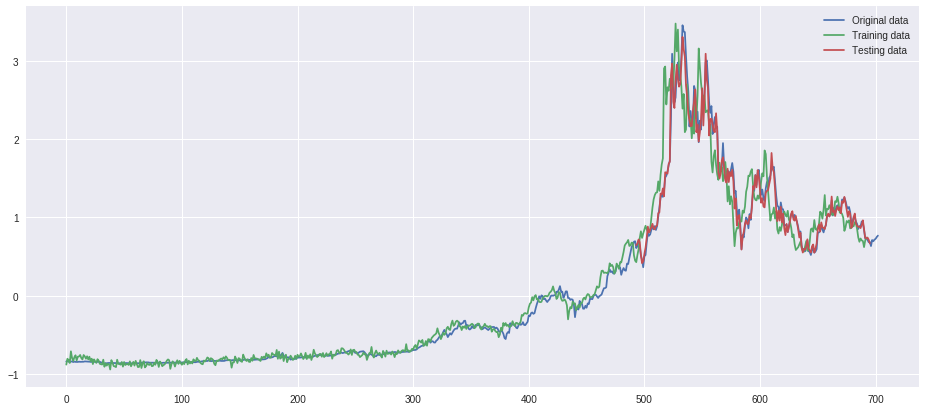

In [158]:
plt.figure(figsize=(16, 7))
plt.plot(scaled_dataset, label='Original data')
plt.plot(sup, label='Training data')
plt.plot(test_results, label='Testing data')
plt.legend()
plt.show()

In [195]:
# 에폭 : 500  드롭아웃 : 20%
Epoch 0/500  Current loss: 0.06694888323545456
Epoch 50/500  Current loss: 0.0073886229656636715
Epoch 100/500  Current loss: 0.00663337018340826
Epoch 150/500  Current loss: 0.006177738308906555
Epoch 200/500  Current loss: 0.007497742306441069
Epoch 250/500  Current loss: 0.006178833078593016
Epoch 300/500  Current loss: 0.004228238016366959
Epoch 350/500  Current loss: 0.004299803636968136
Epoch 400/500  Current loss: 0.005313394591212273
Epoch 450/500  Current loss: 0.003993416205048561
  
  
# 에폭 : 500  드롭아웃 : 30%
Epoch 0/500  Current loss: 0.06542589515447617
Epoch 50/500  Current loss: 0.006817192304879427
Epoch 100/500  Current loss: 0.007563125807791948
Epoch 150/500  Current loss: 0.005066621582955122
Epoch 200/500  Current loss: 0.005121171940118074
Epoch 250/500  Current loss: 0.005533943884074688
Epoch 300/500  Current loss: 0.005702085793018341
Epoch 350/500  Current loss: 0.004063922446221113
Epoch 400/500  Current loss: 0.004329295363277197
Epoch 450/500  Current loss: 0.004526133183389902
  
  
#에폭 : 300  드롭아웃 : 0%
Epoch 0/300  Current loss: 0.06659471243619919
Epoch 50/300  Current loss: 0.007018796168267727
Epoch 100/300  Current loss: 0.005894131027162075
Epoch 150/300  Current loss: 0.005207979120314121
Epoch 200/300  Current loss: 0.0049758851528167725
Epoch 250/300  Current loss: 0.005468552932143211
  
  
#에폭 : 300  드롭아웃 : 10%
Epoch 0/300  Current loss: 0.0623345673084259
Epoch 50/300  Current loss: 0.005556834861636162
Epoch 100/300  Current loss: 0.005832142196595669
Epoch 150/300  Current loss: 0.004671074450016022
Epoch 200/300  Current loss: 0.005246750544756651
Epoch 250/300  Current loss: 0.0050420006737113
  
  
#에폭 : 300  드롭아웃 : 20%
Epoch 0/300  Current loss: 0.054245494306087494
Epoch 50/300  Current loss: 0.007492466829717159
Epoch 100/300  Current loss: 0.005835872609168291
Epoch 150/300  Current loss: 0.005576197057962418
Epoch 200/300  Current loss: 0.0052744667045772076
Epoch 250/300  Current loss: 0.004422354977577925
  


  
  



SyntaxError: ignored